In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,average_precision_score,f1_score
from sklearn import metrics

In [2]:
#Loading the data
# path = r"C:\Users\lijin\Desktop\Sem VI\DSML\A2\data.csv"
# X = np.array(pd.read_csv(path,header = None))
X = pd.read_csv('data.csv',header=None).values

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

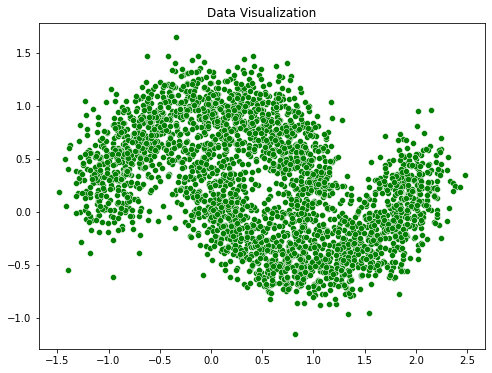

In [4]:
#Visualizing the data
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1], palette = 'bright',color = 'green' ).set_title('Data Visualization')
#plt.legend(title='Class Label')
plt.show()

In [5]:
from sklearn.cluster import KMeans

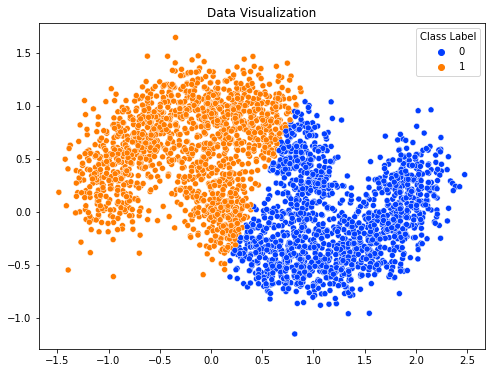

In [6]:
kmeans = KMeans(2)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1], palette = 'bright',hue = identified_clusters ).set_title('Data Visualization')
plt.legend(title='Class Label')
plt.show()

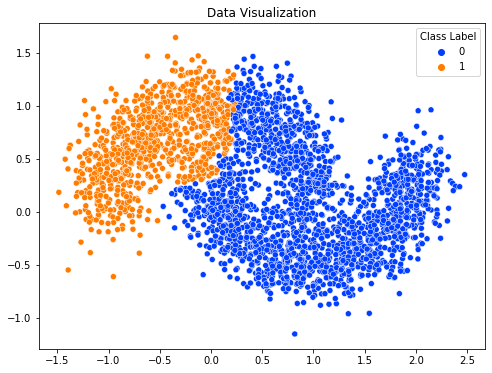

In [7]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2)
agc.fit(X)
identified_clusters = agc.fit_predict(X)
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1], palette = 'bright',hue = identified_clusters ).set_title('Data Visualization')
plt.legend(title='Class Label')
plt.show()

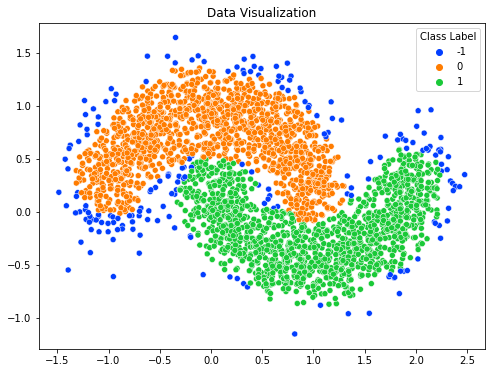

In [8]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=75,algorithm='ball_tree',leaf_size=40)
dbs.fit(X)
identified_clusters = dbs.fit_predict(X)
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1], palette = 'bright',hue = identified_clusters ).set_title('Data Visualization')
plt.legend(title='Class Label')
plt.show()

In [9]:
pd.DataFrame(identified_clusters).value_counts()

 1    1409
 0    1395
-1     196
dtype: int64

In [10]:
x = pd.DataFrame(X)
meanx = x[0].mean()
meany = x[1].mean()

pred = pd.DataFrame(np.zeros(3000))
pred[0] = [1 if (x[1][i] <= meany) and (identified_clusters[i] == -1) else identified_clusters[i] for i in range(len(x))]
pred[0] = [0 if (x[1][i] > meany) and (pred[0][i] == -1) else pred[0][i] for i in range(len(x))]

In [11]:
# pred

In [12]:
pred.value_counts()

1    1502
0    1498
dtype: int64

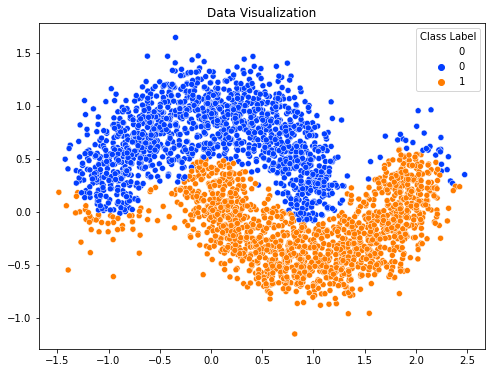

In [13]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1], palette = 'bright',hue = pred[0] ).set_title('Data Visualization')
plt.legend(title='Class Label')
plt.show()

In [14]:
pred2 = pd.DataFrame(np.zeros(3000))
pred2[0] = [0 if (x[0][i] <= meanx) and (identified_clusters[i] == -1) else identified_clusters[i] for i in range(len(x))]
pred2[0] = [1 if (x[0][i] > meanx) and (identified_clusters[i] == -1) else pred[0][i] for i in range(len(x))]
# pred2[0] = [1 if (x[0][i] > meanx) and (identified_clusters[i] == -1) else identified_clusters[i] for i in range(len(x))]

In [15]:
pred2.value_counts()

1    1554
0    1446
dtype: int64

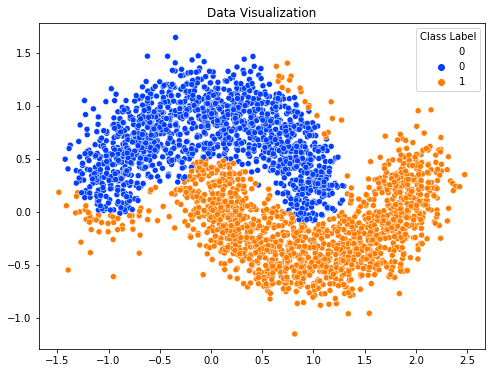

In [16]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1], palette = 'bright',hue = pred2[0] ).set_title('Data Visualization')
plt.legend(title='Class Label')
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters=2).fit(identified_clusters.reshape(1,-1))
pred = km.predict(identified_clusters.reshape(1,-1))

ValueError: n_samples=1 should be >= n_clusters=2.